### Univariate is dervied from 'uni' meaning single and 'variate' refer to variable

Data is of two types: Numerical and Categorical. Univariate EDA for both the types are different. For categorical we can use Count,
percentage of each category and for visualization we can use bar chart, pie charts, etc. For Numerical Data Univariate EDA includes
mean, median, mode, std. dev., variance, quartiles, max, min (Descriptive statistics) and visualization includes histogram, boxplot, pie charts

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv("bank_data_clean.csv")
df.head()

,Unnamed: 0,age,salary,balance,marital,targeted,default,housing,loan,contact,...,month,duration,campaign,pdays,previous,poutcome,response,job,education,year
0,0,58.0,100000,2143,married,yes,no,yes,no,unknown,...,may,4.35,1,NaN,0,unknown,no,management,tertiary,2017
1,1,44.0,60000,29,single,yes,no,yes,no,unknown,...,may,2.52,1,NaN,0,unknown,no,technician,secondary,2017
2,2,33.0,120000,2,married,yes,no,yes,yes,unknown,...,may,1.27,1,NaN,0,unknown,no,entrepreneur,secondary,2017
3,3,47.0,20000,1506,married,no,no,yes,no,unknown,...,may,1.53,1,NaN,0,unknown,no,blue-collar,unknown,2017
4,4,33.0,0,1,single,no,no,no,no,unknown,...,may,3.30,1,NaN,0,unknown,no,unknown,unknown,2017


In [8]:
df.columns

Index(['Unnamed: 0', 'age', 'salary', 'balance', 'marital', 'targeted',
       'default', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response', 'job',
       'education', 'year'],
      dtype='object')

In [9]:
df.isnull().sum()

Unnamed: 0        0
age               0
salary            0
balance           0
marital           0
targeted          0
default           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays         30728
previous          0
poutcome          0
response          0
job               0
education         0
year              0
dtype: int64

In [10]:
df.drop('pdays', axis = 1,inplace= True)
df.isnull().sum()

Unnamed: 0    0
age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
previous      0
poutcome      0
response      0
job           0
education     0
year          0
dtype: int64

In [12]:
df.drop('Unnamed:0', axis = 1,inplace= True)

KeyError: "['Unnamed:0'] not found in axis"

In [13]:
df['age'].describe()

count    37528.000000
mean        40.634087
std         10.442142
min         18.000000
25%         32.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [14]:
df['age'].mode()

0    32.0
Name: age, dtype: float64

In [15]:
df['age'].median()

39.0

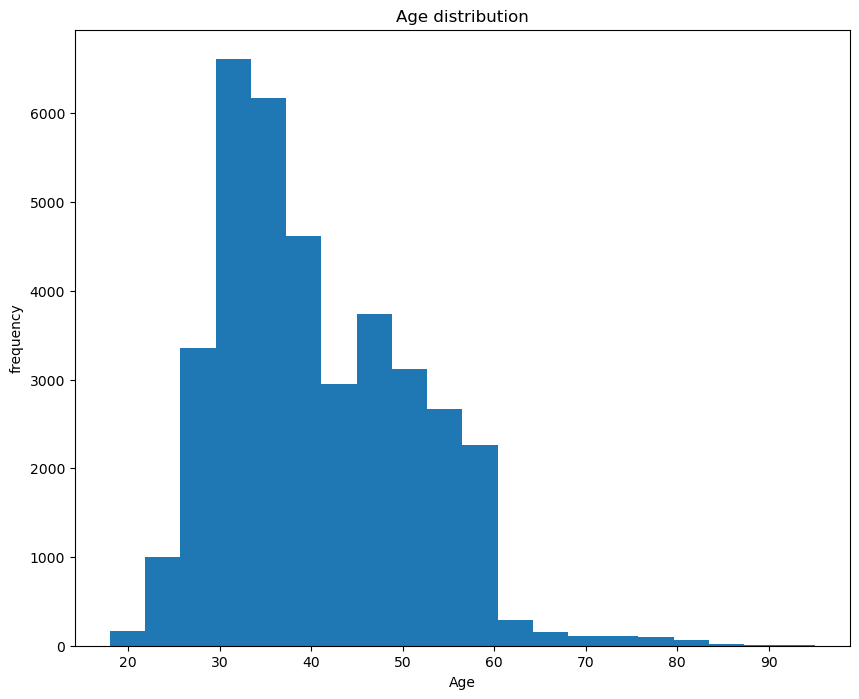

In [16]:
plt.figure(figsize=(10,8))

plt.hist(df.age,bins =20)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

### Boxplot

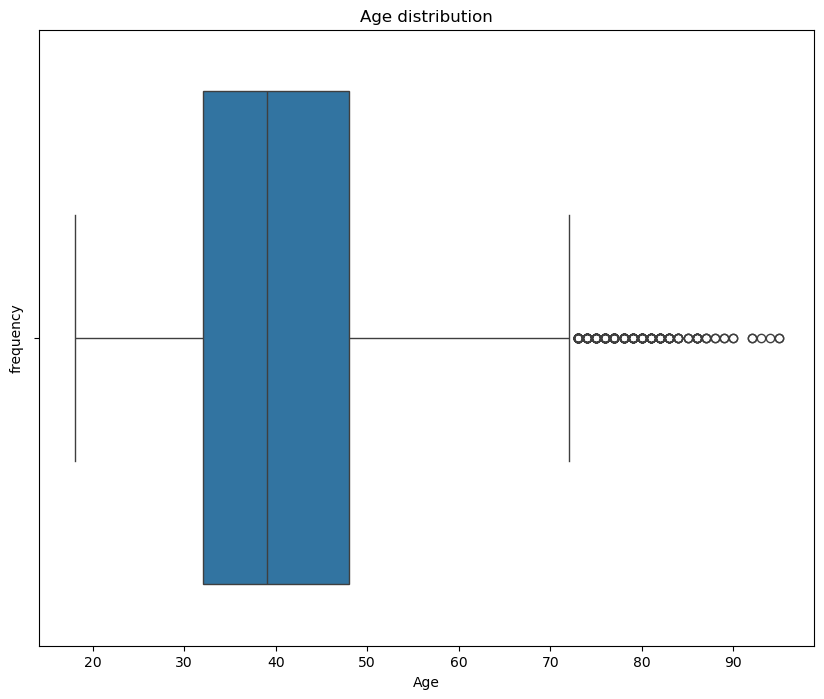

In [17]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df.age)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

### categorical data

In [18]:
df['marital'].describe()

count       37528
unique          3
top       married
freq        22506
Name: marital, dtype: object

In [19]:
df['marital'].value_counts()

marital
married     22506
single      10648
divorced     4374
Name: count, dtype: int64

In [20]:
#if we want data in percentage formate
df['marital'].value_counts(normalize = True).round(2)

marital
married     0.60
single      0.28
divorced    0.12
Name: proportion, dtype: float64

In [21]:
df['marital'].count()

37528

In [22]:
((df['marital'].value_counts()/df['marital'].count())*100).round(2)

marital
married     59.97
single      28.37
divorced    11.66
Name: count, dtype: float64

In [23]:
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center', va='bottom')

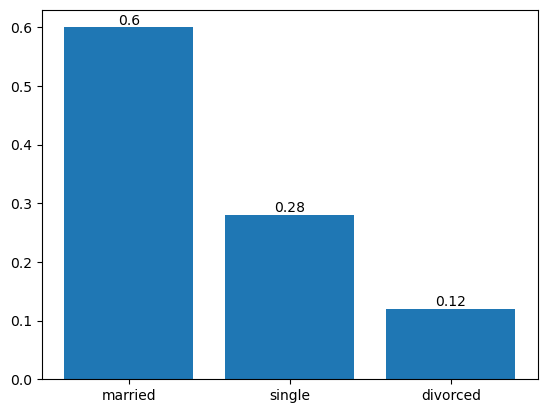

In [24]:
# Generating plots for data visualization.
y=df.marital.value_counts(normalize= True).round(2)
plt.bar(y.index, y.values)
addlabels(y.index,y.values)
plt.show()

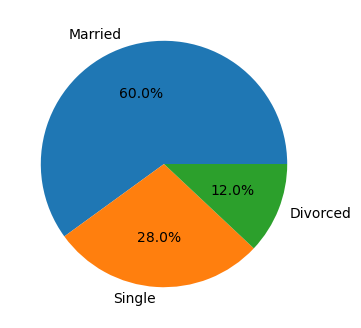

In [25]:
label=['Married','Single','Divorced']
data=[60,28,12]
plt.figure(figsize=(4,4))
plt.pie(data,labels = label,autopct='%1.1f%%')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

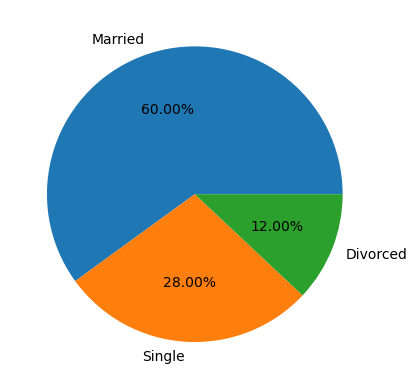

In [26]:
plt.pie(data,autopct='%1.2f%%',labels=label)
plt.show

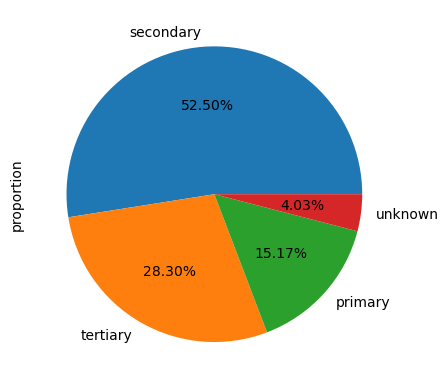

In [27]:
# Generating plots for data visualization.

df. education.value_counts(normalize= True).plot.pie(autopct='%1.2f%%')

plt.show()

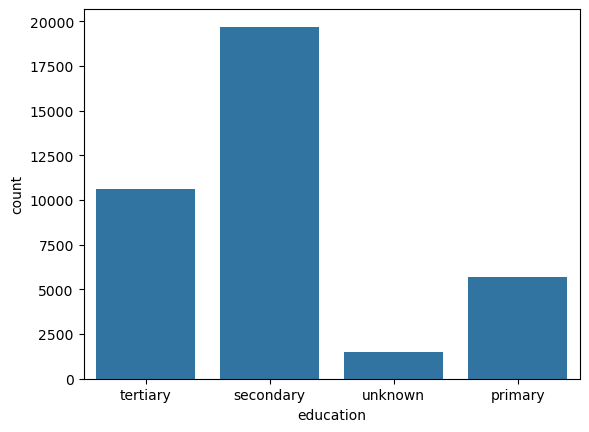

In [32]:
sns.countplot(x = df['education'])
plt.show()

In [33]:
# General data manipulation or analysis operation.
# General data manipulation or analysis operation.

df.response.value_counts(normalize= True)

response
no     0.918434
yes    0.081566
Name: proportion, dtype: float64

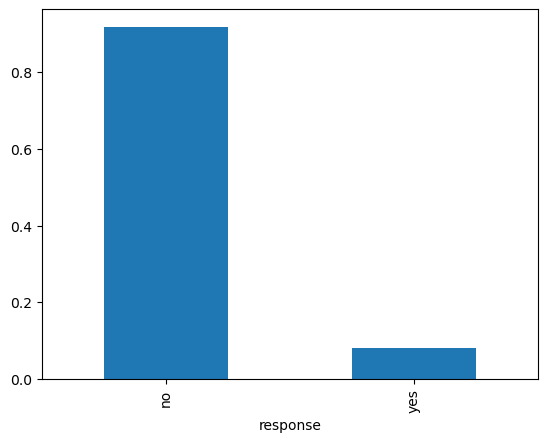

In [34]:
# Data Visualization:
# - This section involves creating plots and charts to visually explore the data.
# - Visualizations help to identify patterns, anomalies, or relationships within the data.
# - `matplotlib` and `seaborn` are powerful libraries for creating a wide range of static, animated, and interactive visualizations.
# Generating plots for data visualization.
df.response.value_counts(normalize= True).plot.bar()
plt.show()

### Bivariate EDA

It involves two variables.Focuses on understanding the relationship between two variables using correlation

### numeric-numeric data EDA:
1. scatterplot
2. pairplot
3. correlation

In [25]:
df

,Unnamed: 0,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome,response,job,education,year
0,0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,may,4.35,1,0,unknown,no,management,tertiary,2017
1,1,44.0,60000,29,single,yes,no,yes,no,unknown,5,may,2.52,1,0,unknown,no,technician,secondary,2017
2,2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,may,1.27,1,0,unknown,no,entrepreneur,secondary,2017
3,3,47.0,20000,1506,married,no,no,yes,no,unknown,5,may,1.53,1,0,unknown,no,blue-collar,unknown,2017
4,4,33.0,0,1,single,no,no,no,no,unknown,5,may,3.30,1,0,unknown,no,unknown,unknown,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37523,45204,73.0,55000,2850,married,yes,no,no,no,cellular,17,nov,5.00,1,8,failure,yes,retired,secondary,2017
37524,45205,25.0,60000,505,single,yes,no,no,yes,cellular,17,nov,6.43,2,0,unknown,yes,technician,secondary,2017
37525,45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,nov,7.60,2,0,unknown,yes,retired,primary,2017
37526,45209,57.0,20000,668,married,yes,no,no,no,telephone,17,nov,8.47,4,0,unknown,no,blue-collar,secondary,2017


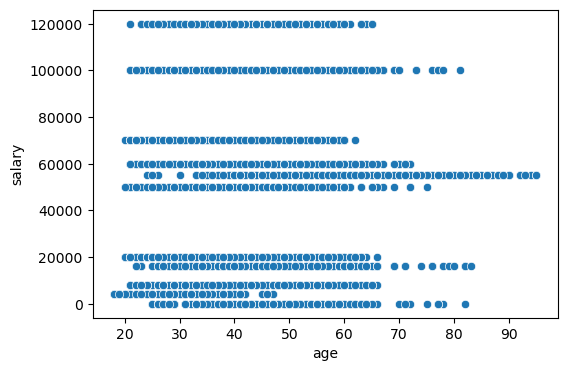

In [29]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df.age,y=df.salary)
plt.show()

- positive correlation: tells that if y will increase than x will be increase and if y will decrease than x will be decrease.
- negative correlation: tells that if y will increase than x will be decrease and if y will decrease than x will be increase
- range of correlation starts from -1 to +1

In [31]:
#calculate the correlation
correl=df[['age','salary']].corr()
correl

,age,salary
age,1.000000,0.023844
salary,0.023844,1.000000


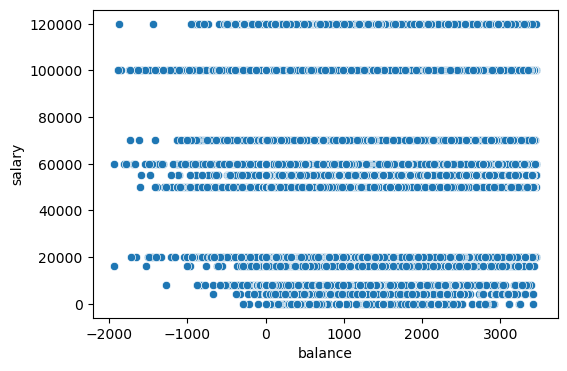

In [32]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df.balance,y=df.salary)
plt.show()

In [34]:
correl=df[['balance','salary']].corr()
correl

,balance,salary
balance,1.000000,0.023575
salary,0.023575,1.000000


In [35]:
correl=df[['age','balance','salary']].corr()
correl

,age,balance,salary
age,1.000000,0.094734,0.023844
balance,0.094734,1.000000,0.023575
salary,0.023844,0.023575,1.000000


### Pair Plot

multiple plots combines if we have large amount of dataset

<Figure size 2000x1000 with 0 Axes>

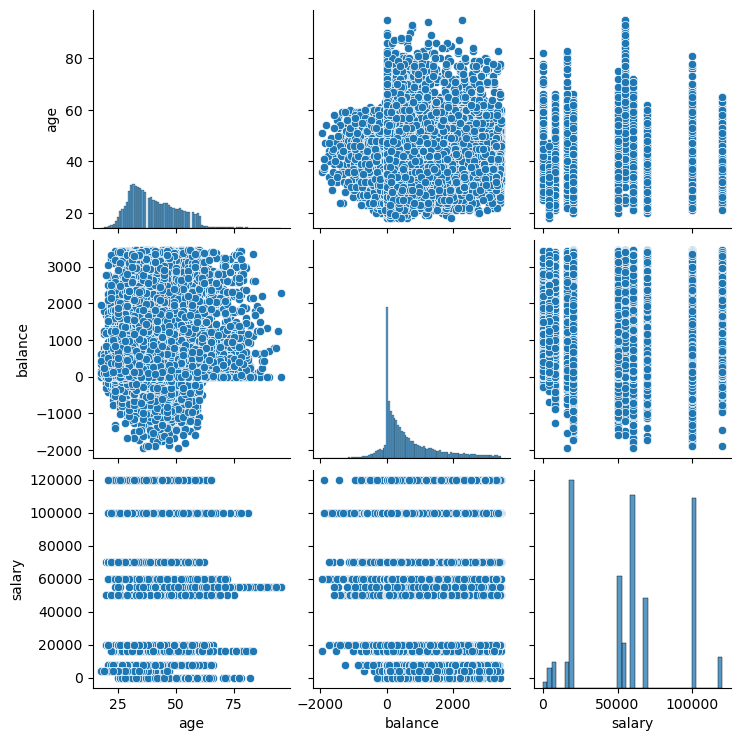

In [37]:
plt.figure(figsize=(20,10))

sns.pairplot(data=df,vars =['age','balance','salary'])
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

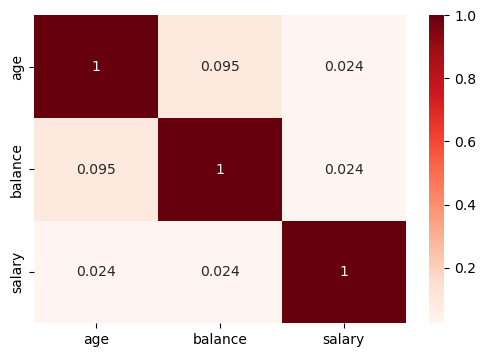

In [41]:
#annot: if we will put true it tells us the values and by default it is false 
plt.figure(figsize=(6,4))
sns.heatmap(correl, annot = True ,cmap='Reds')
plt.show

### numeric-categorical data EDA :

1.boxplot

2.bar plot

In [45]:
df1=df.groupby('response')['salary'].mean()
df1

response
no     56401.456466
yes    58527.605358
Name: salary, dtype: float64

In [48]:
df1=df.groupby('response')['salary'].median()
df1

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

In [52]:
df1=df.groupby('response')['salary'].quantile(0.25)
df1

response
no     20000.0
yes    50000.0
Name: salary, dtype: float64

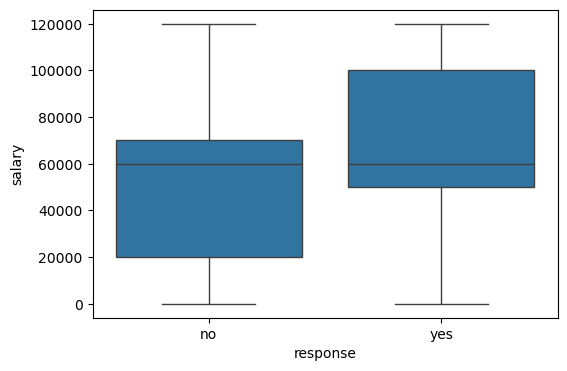

In [47]:
plt.figure(figsize=(6,4))

sns.boxplot(data=df,x='response',y='salary')
plt.show()

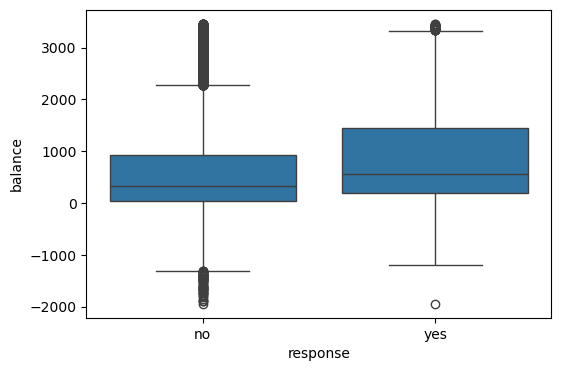

In [50]:
plt.figure(figsize=(6,4))

sns.boxplot(data=df,x='response',y='balance')
plt.show()